In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#import the csv
df = pd.read_csv('../data/train.csv')

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Example: assume df is your DataFrame with 30+ features + target column
# Features (X) and target (y)
X = df.drop(columns=["target", "id"])  # 30+ features
y = df["target"]


# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("R^2 score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R^2 score: 0.008180374601136298
MSE: 0.035188352291488985


In [43]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_.round(4)
})
print(coefficients)



         Feature  Coefficient
0  ps_car_04_cat       0.0026
1  ps_ind_05_cat       0.0039
2  ps_car_11_cat       0.0000
3  ps_car_06_cat       0.0002


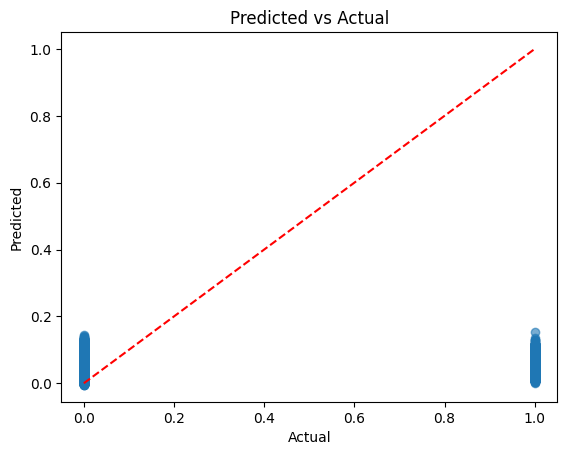

In [29]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.show()

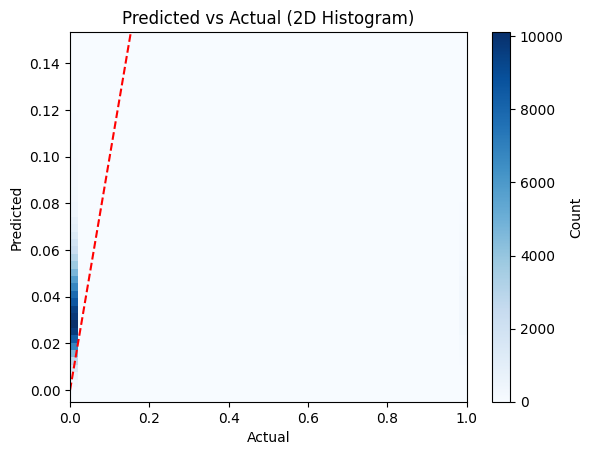

In [28]:
plt.hist2d(y_test, y_pred, bins=50, cmap="Blues")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.colorbar(label="Count")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual (2D Histogram)")
plt.show()

In [60]:
# logistic regression for classification task

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

c:\Users\robin\Desktop\Bootcamp_Files\group-ml-porto-seguro\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
print("Train LogReg accuracy:", model.score(X_train, y_train))
print("Test LogReg accuracy:", model.score(X_test, y_test))

Train LogReg accuracy: 0.9636494605906727
Test LogReg accuracy: 0.9631645707853465


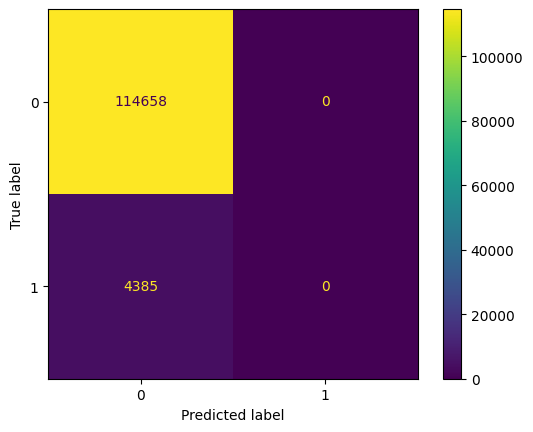

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [64]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114658
           1       0.00      0.00      0.00      4385

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



c:\Users\robin\Desktop\Bootcamp_Files\group-ml-porto-seguro\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\robin\Desktop\Bootcamp_Files\group-ml-porto-seguro\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\robin\Desktop\Bootcamp_Files\group-ml-porto-seguro\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

## Result
We will use a baseline model that predicts a value 0 target for every row. Tthat’s exactly what a **trivial baseline** is supposed to be. ChatGPT says:

---

### 1. **What a baseline model is**

A baseline model is **just a point of comparison**. It doesn’t need to be “good”; it just sets a reference for what performance you can achieve without any real modeling.

* For classification, a simple baseline could be:

  * Predict the **most frequent class** every time (often 0 if your dataset is imbalanced).
  * Predict randomly according to class distribution.

---

### 2. **Implications for metrics**

* Accuracy: Might look decent if the dataset is heavily imbalanced.
* Recall / F1 for the minority class (1): Will be 0, because the model never predicts it.
* That’s fine — it **shows the baseline difficulty** of the problem.

---

### 3. **Why it’s useful**

* When you train a real model later, any **improvement over this baseline** is meaningful.
* For example:

  * Baseline F1 for class 1 = 0
  * Your Logistic Regression or Random Forest F1 for class 1 = 0.4 → now you know your model is actually learning something.

---

### ✅ Takeaway

* A model that predicts everything as 0 is a **valid baseline**.
* The fact that F1 for class 1 is 0 just reflects that the baseline ignores the minority class.
* Always report baseline metrics alongside your real model metrics, so the improvement is clear.

---

If you want, I can show you a **baseline table** with all metrics (accuracy, precision, recall, F1) for a model that predicts all 0s, so you can compare it to your Logistic Regression properly. Do you want me to do that?
